In [1]:
import librosa, librosa.display
import matplotlib.pyplot as plt
import numpy as np 
import soundfile as sf
from sklearn.preprocessing import MinMaxScaler
import pickle
from pydub import AudioSegment

In [4]:
SAMPLE_RATE = 16000
N_MFCC= 13
N_FFT=2048
HOP_LENGTH=500
DURATION = 6
SAMPLES_PER_TRACK = SAMPLE_RATE * DURATION

In [72]:
file_mixed = "pepe.wav"
signal_mixed, sr_mixed = librosa.load(file_mixed, sr=SAMPLE_RATE)

In [73]:
mix_wav, mix_wav_phase = librosa.magphase(librosa.stft(signal_mixed, n_fft=2048, hop_length=HOP_LENGTH))

In [74]:
# np.shape(mix_wav)
# scaler = MinMaxScaler()
# mix_wav=scaler.fit_transform(mix_wav)

# mix_wav.min()

In [75]:
np.shape(mix_wav)

(1025, 192)

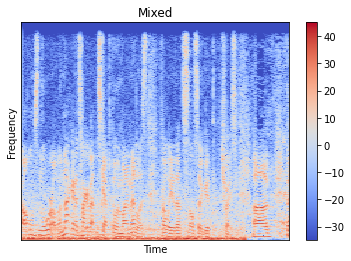

In [76]:
spectrogram_noise = np.abs(mix_wav)

log_spectrogram_mixed= librosa.amplitude_to_db(spectrogram_noise)#Convertimos a db

librosa.display.specshow(log_spectrogram_mixed, sr=16000, hop_length=HOP_LENGTH)## Nos permite visualizar como un mapa de calor
plt.title("Mixed")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.show()

In [7]:
mix_wav=scaler.inverse_transform(mix_wav)

In [8]:
array_phase={
    "phase1":[],
    "phase2":[]
}
array_phase["phase1"].append(mix_wav_phase)
array_phase["phase2"].append(mix_wav_phase)
fp = open("1.txt","wb")
pickle.dump(array_phase,fp,0)

fp.close()

In [9]:
pepe=mix_wav_phase==mix_wav_phase
pepe

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [10]:
fp = open("1.txt","rb")
a = pickle.load(fp)
print(a)
fp.close()

{'phase1': [array([[-1.        -8.7422777e-08j, -1.        -8.7422777e-08j,
         1.        +0.0000000e+00j, ..., -1.        -8.7422777e-08j,
         1.        +0.0000000e+00j,  1.        +0.0000000e+00j],
       [ 1.        -1.3182309e-17j, -0.10182647+9.9480218e-01j,
        -0.6445185 -7.6458871e-01j, ...,  0.9337382 +3.5795683e-01j,
        -0.4067834 +9.1352463e-01j, -0.9985082 +5.4601356e-02j],
       [-1.        +8.7422777e-08j,  0.9412301 -3.3776602e-01j,
         0.30418107-9.5261425e-01j, ...,  0.6022661 +7.9829544e-01j,
         0.02610966-9.9965906e-01j, -0.5271921 +8.4974611e-01j],
       ...,
       [ 1.        -4.1035485e-15j, -0.9999998 +6.3768221e-04j,
         0.23416345-9.7219723e-01j, ..., -0.72363234+6.9018567e-01j,
         0.81284964+5.8247358e-01j, -0.7934755 -6.0860217e-01j],
       [-1.        -8.7422777e-08j,  0.0012321 +9.9999923e-01j,
         0.9385809 +3.4505939e-01j, ..., -0.48841852-8.7260950e-01j,
        -0.40674126+9.1354340e-01j,  0.943429  +3.3

In [13]:
print(type(a["phase1"][0]))

kk=a==mix_wav_phase

kk

<class 'numpy.ndarray'>


array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [ ]:
sf.write(f'./convertido.wav', librosa.core.istft(
        mix_wav * a
        , win_length=2048, hop_length=HOP_LENGTH), SAMPLE_RATE)

## Pruebas MFCCs


In [2]:
SAMPLE_RATE = 22050
N_MFCC= 15
N_FFT=512
HOP_LENGTH=259
DURATION = 3

In [3]:
file_mixed = "mixed_sound6255.wav"
signal_mixed, sr_mixed = librosa.load(file_mixed, sr=SAMPLE_RATE)

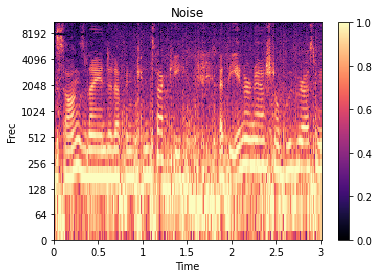

In [6]:
stft, wav_phase = librosa.magphase(librosa.stft(signal_mixed,
                            n_fft=N_FFT,
                            hop_length=HOP_LENGTH)[:-1])
spectrogram = np.abs(stft)
log_spectrogram = librosa.amplitude_to_db(spectrogram)

scaler = MinMaxScaler()
mel_spec_power=scaler.fit_transform(log_spectrogram)

np.shape(mel_spec_power)

librosa.display.specshow(mel_spec_power, sr=SAMPLE_RATE, hop_length=HOP_LENGTH,x_axis='s', y_axis='log')## Nos permite visualizar como un mapa de calor
plt.title("Noise")
plt.xlabel("Time")
plt.ylabel("Frec")
plt.colorbar()
plt.show()

mel_spec=scaler.inverse_transform(mel_spec_power)

spec = librosa.db_to_amplitude(mel_spec)
# apply Griffin-Lim
signal = librosa.istft(spec*wav_phase, hop_length=HOP_LENGTH)

# librosa.core.istft(
#         invertido * mix_wav_phase
#         , win_length=2048, hop_length=HOP_LENGTH)

sf.write(f'./convertido6255.wav',signal, SAMPLE_RATE)

In [23]:
mix_wav, mix_wav_phase = librosa.magphase(librosa.stft(signal_mixed, n_fft=N_FFT, hop_length=HOP_LENGTH))
# mix_wav, mix_wav_phase = librosa.magphase(librosa.stft(signal_mixed))

In [24]:
mel_spec= librosa.feature.melspectrogram(S=mix_wav,sr=SAMPLE_RATE,n_fft=N_FFT,hop_length=HOP_LENGTH)

# mel_spec= librosa.feature.melspectrogram(S=mix_wav,sr=SAMPLE_RATE)

In [25]:
mel_spec[0][0]

2.500922

In [26]:
# mel_spec_power= librosa.power_to_db(mel_spec, ref=np.max)

In [27]:
# mel_spec_power[0][0]

In [28]:
np.shape(mel_spec)

(128, 192)

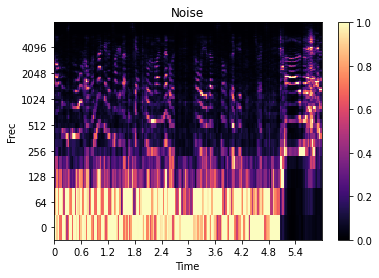

In [32]:
scaler = MinMaxScaler()
mel_spec_power=scaler.fit_transform(mel_spec)

np.shape(mel_spec_power)

librosa.display.specshow(mel_spec_power, sr=SAMPLE_RATE, hop_length=HOP_LENGTH,x_axis='s', y_axis='log')## Nos permite visualizar como un mapa de calor
plt.title("Noise")
plt.xlabel("Time")
plt.ylabel("Frec")
plt.colorbar()
plt.show()

In [49]:
mel_spec=scaler.inverse_transform(mel_spec)

In [50]:
invertido=librosa.feature.inverse.mel_to_stft(mel_spec,sr=SAMPLE_RATE,n_fft=N_FFT)

invertido,magphase=librosa.magphase(invertido)

In [53]:
sf.write(f'./convertido_mel.wav', librosa.core.istft(
        invertido * mix_wav_phase
        , win_length=2048, hop_length=HOP_LENGTH), SAMPLE_RATE)

In [ ]:
file_mixed = "pepe.wav"
signal_mixed, sr_mixed = librosa.load(file_mixed, sr=SAMPLE_RATE)

In [16]:
from pydub import AudioSegment

def match_target_amplitude(sound, target_dBFS):
    change_in_dBFS = target_dBFS - sound.dBFS
    return sound.apply_gain(change_in_dBFS)

sound = AudioSegment.from_file("pepe.wav", "wav")
normalized_sound = match_target_amplitude(sound, -18.0)
normalized_sound.export("pepe_normalized.wav", format="wav")

sound = AudioSegment.from_file("1-11687-A.wav", "wav")
normalized_sound = match_target_amplitude(sound, -18.0)
normalized_sound.export("1-11687-A_normalized.wav", format="wav")

<_io.BufferedRandom name='1-11687-A_normalized.wav'>

In [9]:
y, sr = librosa.load("pepe_normalized.wav")
mean = np.abs(y).mean()
mean

0.095913984

In [10]:
sound = AudioSegment.from_file("pepe_normalized.wav", "wav")
sound.dBFS

-18.000519641475478

In [11]:
y, sr = librosa.load("1-11687-A_normalized.wav")
mean = np.abs(y).mean()
mean

0.085862115

In [12]:
sound = AudioSegment.from_file("1-11687-A_normalized.wav", "wav")
sound.dBFS

-18.000519641475478